Empezaremos con un problema de clasificación antes de pasar a clustering.

Trabajaremos sobre el conjunto de datos iris.

### EDA

In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import pandas as pd

iris = pd.read_csv("https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/iris.csv",
                  index_col = 0)
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


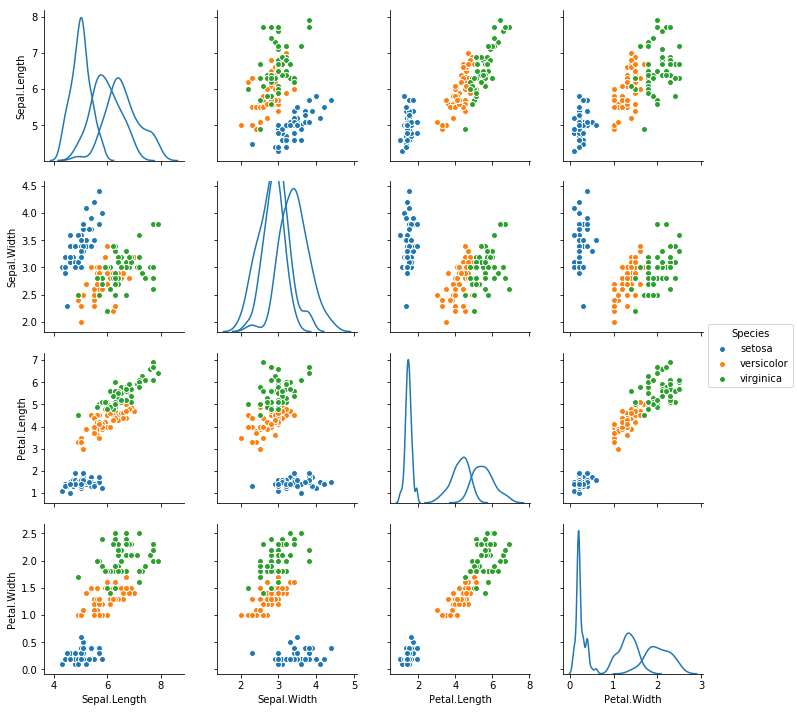

In [2]:
import seaborn as sns

sns.pairplot(iris, hue="Species", diag_kind="kde")

### Classfication using neural network
- Using train and test sets

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = iris[iris.columns[0:4]]
y = iris[iris.columns[4]]

# random_state: semilla del generador de números aleatorios
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)

scaler = StandardScaler()  # Estandariza los valores (mean=0, std=1)

# Ajustamos el objeto scaler solo para los datos de entrenamiento
scaler.fit(X_train)

# Aplicaremos la transformación del objeto scaler a X_train y X_test
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
# Importamos el el clasificador (Multi Layer Perceptron)
from sklearn.neural_network import MLPClassifier

# Creamos el clasificador con 15 unidades en la capa oculta
mlp = MLPClassifier(hidden_layer_sizes=(15,), max_iter=500)
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(15,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        10
 versicolor       1.00      1.00      1.00         9
  virginica       1.00      1.00      1.00        11

avg / total       1.00      1.00      1.00        30



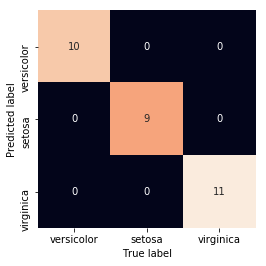

In [5]:
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt 

# Vamos a predecir usando el conjunto de prueba
predictions = mlp.predict(X_test)

# Creamos la matriz de confusión
cm = pd.DataFrame(confusion_matrix(y_test, predictions),
                  columns=y_test.unique(),
                  index=y_test.unique())

# Representamos la matriz usando un heatmap
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('True label')
plt.ylabel('Predicted label')

print(classification_report(y_test,predictions))
# Vaya al siguiente enlace: https://en.wikipedia.org/wiki/Precision_and_recall
# Calcule los valores de precision and recall para la matriz completa
# y para cada clase.
# Interprete los resultados

### Cross validation

In [6]:
# Otra forma de validad nuestro modelo es a través
# de cross-validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(mlp, X, y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.95 (+/- 0.12)


# K-means clustering

### Vamos a usar k-means para definir clústeres en el conjunto de datos iris

- Recursos
  - https://datasciencelab.wordpress.com/2013/12/27/finding-the-k-in-k-means-clustering/ 
  - http://people.sc.fsu.edu/~jburkardt/datasets/hartigan/hartigan.html
  - http://datascience.stackexchange.com/questions/5656/k-means-what-are-some-good-ways-to-choose-an-efficient-set-of-initial-centroids
  - https://rpubs.com/FelipeRego/K-Means-Clustering
  - http://www.r-statistics.com/2013/08/k-means-clustering-from-r-in-action/

In [7]:
# Importamos el objeto cluster 
from sklearn import cluster

# Definimos nuestro objeto cluster Kmeans para 3 clústeres/centroides
km3 = cluster.KMeans(n_clusters=3)
km3.fit(X)

# En clusteres tenemos ahora un valor numérico de 0 a 2 para los
# tres clústeres
clusteres = km3.labels_

### Plot the clustering results:

- You need to download the following script to the working directory:
https://raw.githubusercontent.com/marsgr6/r-scripts/master/scripts/SeabornFig2Grid.py

- Or plot separately the lmplots.

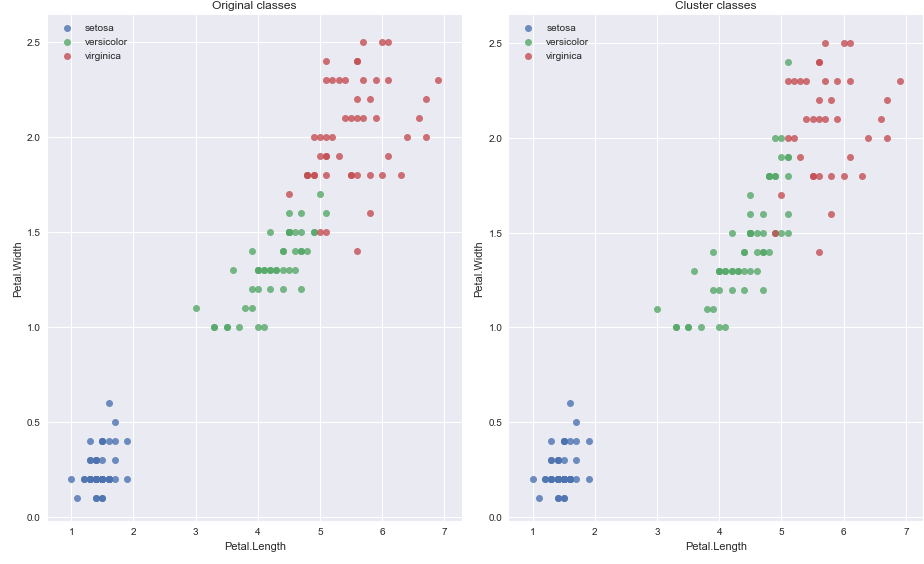

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns; sns.set()
import SeabornFig2Grid as sfg

# Vamos a graficar las etiquetas predichas (clústeres)
# vs las etiquetas reales

# Class labels
sp_labels = np.array(["setosa", "versicolor", "virginica"])

# scatter plot in seaborn (see lmplot)
g0 = sns.lmplot(x='Petal.Length', y='Petal.Width', data=iris, 
           hue="Species", fit_reg=False)
plt.legend(sp_labels)
plt.title("Original classes")  # We have just plotted the original data

# Plot the data with the cluster labels
# Remember the algorithm gives 0,1,2 we will translate to the
# respective value in Species
# Note that the order may not coincide, thus we will give the correct order

# The order given by the cluster algorithm is as follows
clases = [[0],[1],[2]]

# Concatenate the clusters to their respective centroids
centers = np.concatenate((km3.cluster_centers_[:,2:4], clases), axis=1)

# Sort the centers according to variable 0 
centers = centers[centers[:,0].argsort()]

# Now we can assign the correct labels according the correct order
cluster_labels = sp_labels[centers[:,2].astype(int)]

# We will plot the original data X
iris_clusteres = X.copy()

# With the corresponding label (sorted above)
iris_clusteres['Species'] = cluster_labels[clusteres]

# scatter plot in seaborn (see lmplot) for clustered data
fig = plt.figure(figsize=(13,8))
gs = gridspec.GridSpec(1, 2)
g1 = sns.lmplot(x='Petal.Length', y='Petal.Width', data=iris_clusteres, 
           hue="Species", fit_reg=False)
plt.legend(cluster_labels)
plt.title("Cluster classes")

mg0 = sfg.SeabornFig2Grid(g0, fig, gs[0])
mg1 = sfg.SeabornFig2Grid(g1, fig, gs[1])

gs.tight_layout(fig)
plt.legend(sp_labels)

### Build a confusion matrix to check the clustering

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        50
 versicolor       0.77      0.96      0.86        50
  virginica       0.95      0.72      0.82        50

avg / total       0.91      0.89      0.89       150



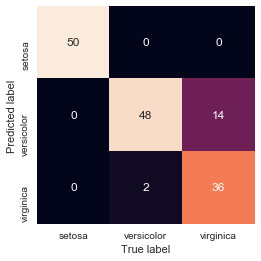

In [9]:
# Confusion matrix for the clustering result (remember we know the classes)
# The order should be the same as above

# Vamos a "predecir" con km3 (conocemos las etiquetas)
# Usamos el conjunto total de datos X
predictions = km3.predict(X)
y_pred = cluster_labels[predictions]

# Creamos la matriz de confusión
cm = pd.DataFrame(confusion_matrix(y, y_pred),
                  columns=y.unique(),
                  index=y.unique())

# Representamos la matriz usando un heatmap
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('True label')
plt.ylabel('Predicted label')

print(classification_report(y,y_pred))

In [10]:
# Datos: https://drive.google.com/open?id=1pDdwnLyjt-L9ODAzaZfwDRTYeW0ap86t

datos = pd.read_csv("UX_data.csv")
datos.head()

,SUS,Time,ID,Gender,Age,Kinect,NUI,Games
0,42.5,179.3,student,M,twenty,high,average,high
1,92.5,153.3,student,M,twenty,high,high,high
2,95.0,135.7,student,M,twenty,average,average,high
3,92.5,148.3,student,F,twenty,average,high,high
4,80.0,148.0,student,M,twenty,average,average,high


In [11]:
# Vamos a transformar nuestros datos a numérico

datos['Gender'] = np.where(datos['Gender']=='M', 1, 0)
datos['ID'] = np.where(datos['ID']=='employee', 1, 0)
datos['Age'] = np.where(datos['Age']=='twenty', 0, 
                        np.where(datos['Age']=='thirty', 1, 2))
datos['Kinect'] = np.where(datos['Kinect']=='none', 0, 
                        np.where(datos['Kinect']=='average', 1, 2))
datos['NUI'] = np.where(datos['NUI']=='none', 0, 
                        np.where(datos['NUI']=='average', 1, 2))
datos['Games'] = np.where(datos['Games']=='none', 0, 
                        np.where(datos['Games']=='average', 1, 2))

datos.head()

,SUS,Time,ID,Gender,Age,Kinect,NUI,Games
0,42.5,179.3,0,1,0,2,1,2
1,92.5,153.3,0,1,0,2,2,2
2,95.0,135.7,0,1,0,1,1,2
3,92.5,148.3,0,0,0,1,2,2
4,80.0,148.0,0,1,0,1,1,2


In [12]:
scaler = StandardScaler()  # Estandariza los valores (mean=0, std=1)

# Ajustamo el objeto scaler solo para los datos de entrenamiento
scaler.fit(datos)

# Aplicaremos la transformación del objeto scaler a datos
datos = scaler.transform(datos)

# Aplicamos K means con 2 clusters/centroides
ux2 = cluster.KMeans(n_clusters=2)
ux2.fit(datos)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [13]:
from sklearn import decomposition

pca = decomposition.PCA()
pca.fit(datos)
pca.n_components = 3
datos_pca = pca.fit_transform(datos)
datos_pca

array([[-1.6411793 ,  2.16277035,  2.09772378],
       [-2.64750776,  0.75787083, -0.64968597],
       [-2.1118192 , -0.9847435 , -0.73370456],
       [-1.47663018,  0.75399697, -2.15559204],
       [-1.81249743, -0.25833934, -0.11412485],
       [-2.27444747,  0.05910248, -1.03141591],
       [-1.17601102, -0.42548115,  0.27788298],
       [-2.28458463,  0.24561441, -0.68235117],
       [-1.48851407,  0.12311247, -0.56061449],
       [ 2.39866876,  1.63501494, -0.18676612],
       [ 0.10352532,  2.88250961,  0.19944635],
       [-0.00678424,  0.16213808,  0.7656496 ],
       [-1.75256186, -1.28391979,  0.43987496],
       [-1.38854517, -0.02997858, -1.04728234],
       [-0.80367969, -1.91064649,  1.41906949],
       [-1.69357916, -1.06366783,  0.28956557],
       [-1.60677365, -2.25725863,  0.49038809],
       [-0.23992513, -0.22515501,  2.78397733],
       [ 2.32495685,  1.85982501,  0.77583432],
       [ 2.82782664, -1.06407688,  1.36774328],
       [-0.75470791,  2.12844532,  0.993

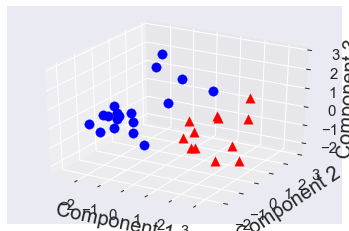

In [14]:
from mpl_toolkits.mplot3d import Axes3D

xv = datos_pca[:,0]
yv = datos_pca[:,1]
zv = datos_pca[:,2]
col = np.where(ux2.labels_==1, 'b', 'r')
mc = np.where(ux2.labels_==1, 'o', '^')

fig = plt.figure()
ax3D = fig.add_subplot(111, projection='3d')

for i in range(30):
    xs = xv[i]
    ys = yv[i]
    zs = zv[i]
    ax3D.scatter(xs, ys, zs, s=90, c=col[i], marker=mc[i])


ax3D.tick_params(axis='both', which='major', labelsize=15)
ax3D.xaxis.label.set_size(20)
ax3D.yaxis.label.set_size(20)
ax3D.zaxis.label.set_size(20)

ax3D.set_xlabel('Component 1')
ax3D.set_ylabel('Component 2')
ax3D.set_zlabel('Component 3')

plt.show()

In [15]:
# Cargaremos los datos originales
# Cuales son las características de cada cluster
datos = pd.read_csv("UX_data.csv")
datos['cluster'] = ux2.labels_  # Etiquetas numéricas
datos['cluster'] = np.where(datos['cluster']==0, 'c0', 'c1')  # Etiquetas categoricas
datos.head()

,SUS,Time,ID,Gender,Age,Kinect,NUI,Games,cluster
0,42.5,179.3,student,M,twenty,high,average,high,c1
1,92.5,153.3,student,M,twenty,high,high,high,c1
2,95.0,135.7,student,M,twenty,average,average,high,c1
3,92.5,148.3,student,F,twenty,average,high,high,c1
4,80.0,148.0,student,M,twenty,average,average,high,c1


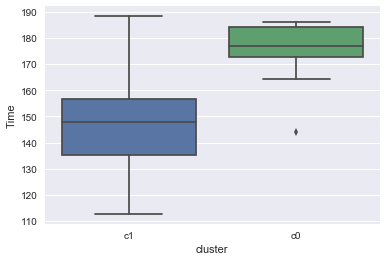

In [16]:
sns.boxplot(x="cluster", y="Time", data=datos)

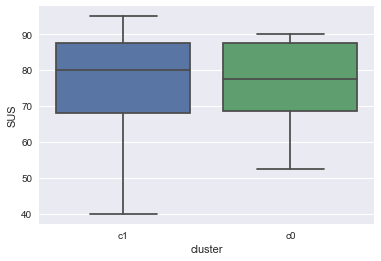

In [17]:
sns.boxplot(x="cluster", y="SUS", data=datos)

(<matplotlib.figure.Figure at 0x1a1dc86c88>,
 OrderedDict([(('M', 'student', 'c1'),
               (0.0, 0.0, 0.66187907469305363, 0.6478405315614618)),
              (('M', 'student', 'c0'),
               (0.66334991708126034, 0.0, 0.0, 0.6478405315614618)),
              (('M', 'employee', 'c1'),
               (0.0,
                0.6511627906976744,
                0.28366246058273725,
                0.34883720930232553)),
              (('M', 'employee', 'c0'),
               (0.28513330297094402,
                0.6511627906976744,
                0.37821661411031632,
                0.34883720930232553)),
              (('F', 'student', 'c1'),
               (0.66832504145936988,
                0.0,
                0.33093953734652687,
                0.19933554817275748)),
              (('F', 'student', 'c0'), (1.0, 0.0, 0.0, 0.19933554817275748)),
              (('F', 'employee', 'c1'),
               (0.66832504145936988,
                0.2026578073089701,
             

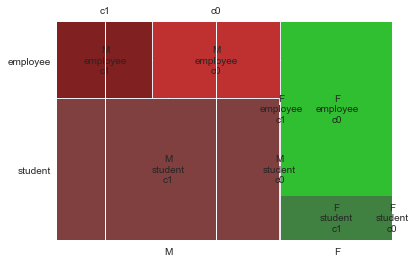

In [18]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(datos, ['Gender', 'ID', 'cluster'])

- Try the exercise above without scaling the data